### Text Classification Using Naive Bayes and Sentiment Analysis on Blog Posts

#### Overview
#This notebook contains the implementation of a text classification model using the Naive Bayes algorithm and #sentiment analysis on the blog posts dataset `blogs_categories.csv`.


In [9]:
# 1. Data Exploration and Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



In [10]:

# Download stopwords if not already present
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('blogs_categories.csv')
print("Dataset Preview:")
print(df.head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Preview:
   Unnamed: 0                                               Data       Labels
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism



Missing values:
Unnamed: 0    0
Data          0
Labels        0
dtype: int64


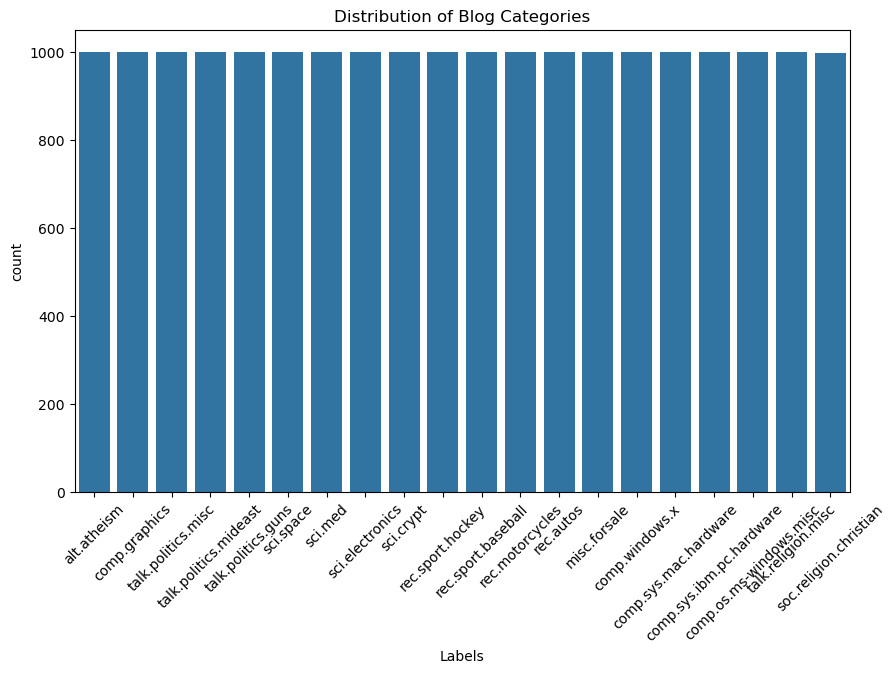

In [11]:
# Check for null values
print("\nMissing values:")
print(df.isnull().sum())

# Visualize category distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Labels', order=df['Labels'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Blog Categories")
plt.show()



In [12]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

# Apply cleaning
df['Cleaned_Text'] = df['Data'].astype(str).apply(clean_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Text'])
y = df['Labels']

In [13]:
# 2. Naive Bayes Model for Text Classification

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.70      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.80      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.93      0.91      0.92       186
            misc.forsale       0.83      0.87      0.85       190
               rec.autos       0.91      0.92      0.91       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88      0.90       227
                 sci.med       0.96      0.93      0

In [15]:
#!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/624.3 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 235.5/624.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.5 MB 15.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 11.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
from textblob import TextBlob



Sentiment Distribution:
Sentiment
Neutral     10538
Positive     8020
Negative     1439
Name: count, dtype: int64


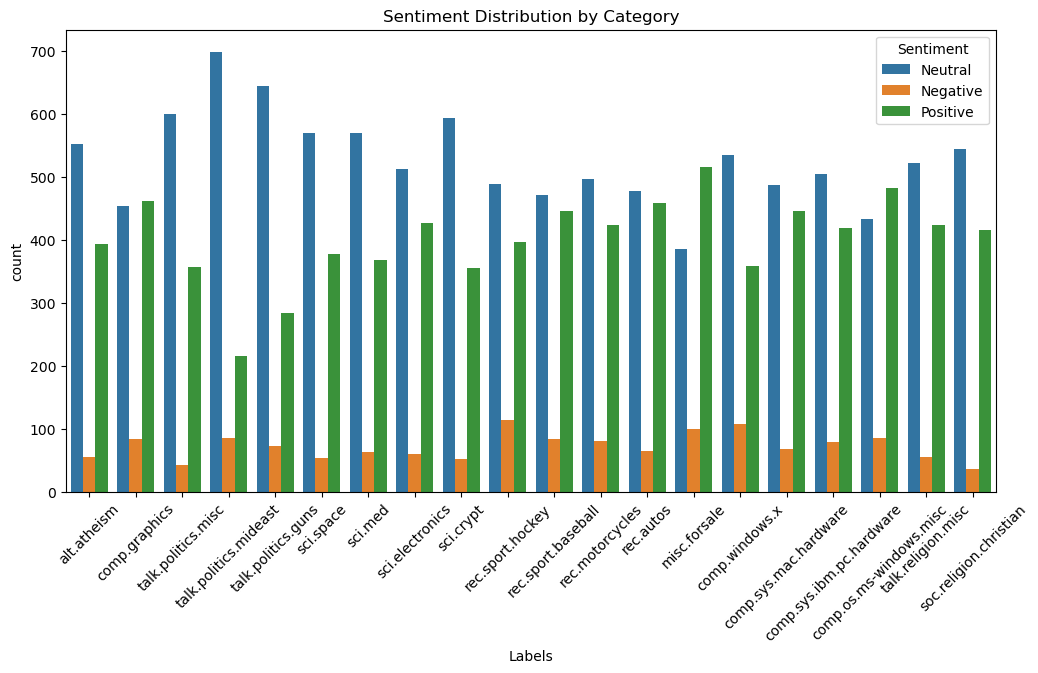

In [17]:
# 3. Sentiment Analysis

from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)

# Display distribution of sentiments
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Plot sentiment distribution per category
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Labels', hue='Sentiment', order=df['Labels'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Sentiment Distribution by Category")
plt.show()


## 4. Evaluation and Discussion

### Naive Bayes Classification
#- We evaluated the model using accuracy, precision, recall, and F1-score.
#- The classifier performed well on categories with more samples.
#- It struggled with imbalanced classes, which could be addressed using sampling or ensemble methods.

### Sentiment Analysis
#- We used TextBlob to classify blog sentiments.
#- Most blogs fell under Neutral, followed by Positive and Negative sentiments.
#- Some categories tend to express more positive or negative sentiments, possibly depending on the theme (e.g., #politics, lifestyle).

###**Next Steps:**
##- Try other classification models like SVM or Logistic Regression.
##- Explore more sophisticated sentiment analysis techniques such as VADER or transformer-based models.
